In [4]:
for i in range(10):
    results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                          t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                          coherence_level=+0.0, w_pos=2.0, mu0_mean_stimulus_Hz=250 * b2.Hz,
                                          max_sim_time=2000. * b2.ms)
    results_list.append(results)

simulating 426 neurons. Start: Tue Jun 14 15:39:44 2022
sim end: Tue Jun 14 15:41:11 2022
simulating 426 neurons. Start: Tue Jun 14 15:41:11 2022
sim end: Tue Jun 14 15:42:41 2022
simulating 426 neurons. Start: Tue Jun 14 15:42:41 2022
sim end: Tue Jun 14 15:44:10 2022
simulating 426 neurons. Start: Tue Jun 14 15:44:10 2022
sim end: Tue Jun 14 15:45:38 2022
simulating 426 neurons. Start: Tue Jun 14 15:45:38 2022
sim end: Tue Jun 14 15:47:07 2022
simulating 426 neurons. Start: Tue Jun 14 15:47:07 2022
sim end: Tue Jun 14 15:48:34 2022
simulating 426 neurons. Start: Tue Jun 14 15:48:34 2022
sim end: Tue Jun 14 15:50:03 2022
simulating 426 neurons. Start: Tue Jun 14 15:50:03 2022
sim end: Tue Jun 14 15:51:31 2022
simulating 426 neurons. Start: Tue Jun 14 15:51:31 2022
sim end: Tue Jun 14 15:53:00 2022
simulating 426 neurons. Start: Tue Jun 14 15:53:00 2022
sim end: Tue Jun 14 15:54:28 2022


In [11]:
def get_results_idx(list, idx):
    result = results_list[idx]
    rateA = result['rate_monitor_A']
    rateB = result['rate_monitor_B']
    return rateA, rateB
    

In [13]:
rsl = get_results_idx(results_list,0)

In [14]:
rsl[0]

<PopulationRateMonitor, recording neurongroup_1>

308. ms 0. s


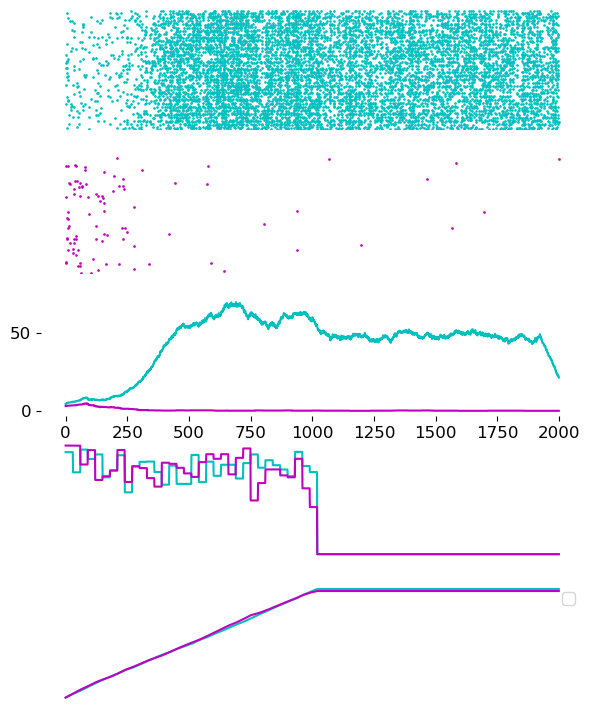

In [40]:
import gdt
import pf1 as pf

tn = 3
rlt = get_results_idx(results_list,tn)
gdt.get_decision_time(rlt[0], rlt[1], rate_threshold = 20.1*b2.Hz)
pf.figure3(results_list[tn])

In [5]:
results

{'rate_monitor_A': <PopulationRateMonitor, recording neurongroup_41>,
 'spike_monitor_A': <SpikeMonitor, recording from spikemonitor_41>,
 'voltage_monitor_A': <StateMonitor, recording ['v'] from neurongroup_41>,
 'idx_monitored_neurons_A': [71,
  6,
  75,
  27,
  30,
  73,
  84,
  69,
  51,
  48,
  12,
  39,
  22,
  78,
  2,
  25,
  53,
  76,
  56,
  32,
  16,
  31,
  20,
  68,
  13,
  40,
  17,
  54,
  8,
  34,
  43,
  72,
  11,
  41,
  0,
  42,
  28,
  24,
  23,
  18,
  21,
  74,
  67,
  14,
  60,
  59,
  46,
  45,
  58,
  36,
  80,
  29,
  38,
  83,
  82,
  52,
  19,
  7,
  64,
  26,
  37,
  62,
  63,
  33,
  9,
  79,
  3,
  15,
  66,
  49,
  81,
  35,
  61,
  10,
  57,
  65,
  50,
  70,
  1,
  5,
  55,
  77,
  4,
  47,
  44],
 'rate_monitor_B': <PopulationRateMonitor, recording neurongroup_42>,
 'spike_monitor_B': <SpikeMonitor, recording from spikemonitor_42>,
 'voltage_monitor_B': <StateMonitor, recording ['v'] from neurongroup_42>,
 'idx_monitored_neurons_B': [37,
  9,
  55,
  

In [5]:
rate_excit_A =  results['rate_monitor_A']
rate_excit_B =  results['rate_monitor_B']

In [9]:
import pickle

In [10]:
with open('abc.pkl', 'wb') as outp:
        pickle.dump(rate_excit_A, outp, pickle.HIGHEST_PROTOCOL)

TypeError: cannot pickle 'weakref' object

In [6]:
import dill


In [7]:
with open('./data.pkl', 'wb') as f:
    dill.dump(rate_excit_A, f)

PicklingError: Can't pickle <function wrap_function_dimensionless.<locals>.f at 0x0000023474DDD900>: it's not found as brian2.units.unitsafefunctions.wrap_function_dimensionless.<locals>.f

In [2]:
import numpy
import brian2 as b2


# 
smoothed_rateA = rateA.smooth_rate(window="flat", width=120.1*b2.ms)/b2.Hz

NameError: name 'rateA' is not defined

In [44]:
ts = rateB.t/b2.ms

In [46]:
ts[10000]

1000.0

In [4]:
smoothed_rateA

NameError: name 'smoothed_rateA' is not defined

In [39]:
smoothed_rateA

array([2.64485478, 2.64485478, 2.64485478, ..., 0.        , 0.        ,
       0.        ])

In [34]:
import numpy
import brian2 as b2


def gdt(rateA, rateB, avg_window_width=120.1*b2.ms,  rate_threshold=45.6*b2.Hz):
    
    
 
    
    #find which pop wins at last

    #rateA = rate_monitors["rate_monitor_A"]
    #rateB = rate_monitors["rate_monitor_B"]

    #window_width = 100.1 * b2.
    #(ax_rate) = plt.plot(figsize=(5,5))
    #t_max  = 1500
    #t_min = 0 
    #ts = rateA.t / b2.ms
    #idx_rate = (ts >= t_min) & (ts <= t_max)
    
    smoothed_rateA = rateA.smooth_rate(window="flat", width=avg_window_width)/b2.Hz
    smoothed_rateB = rateB.smooth_rate(window="flat", width=avg_window_width)/b2.Hz

    if (smoothed_rateB.max() < smoothed_rateA.max()):

        A_win = True
    else:

        A_win = False


    #get the firing rate differences between A and B

    if A_win:
        rate_diff = smoothed_rateA - smoothed_rateB
        winner = 'A'

    
    else:
        rate_diff = smoothed_rateB - smoothed_rateA
        winner = 'B'
    
    
    # find the time when the divergen starts happening
    threshold = rate_threshold/b2.Hz

    above_thre = (rate_diff > threshold)
    idx_over_threshold = numpy.where(above_thre==True)

    decision_time = idx_over_threshold[0][0];
    
    decision_time_in_ms = (decision_time/10)*b2.ms

    if A_win:
        decision_time_A = decision_time_in_ms
        decision_time_B = 0*b2.ms

    else:
        decision_time_A = 0*b2.ms
        decision_time_B = decision_time_in_ms
        



    return decision_time_A, decision_time_B



In [5]:
a = results["rate_monitor_A"]

In [15]:
data ={}

In [16]:
data['rate_a'] = a

In [17]:
data['rate_b'] = smoothed_rates_B

In [18]:
data

{'rate_a': array([2.27299447, 2.27299447, 2.27299447, ..., 0.        , 0.        ,
        0.        ]),
 'rate_b': array([ 2.82164831,  2.82164831,  2.82164831, ..., 25.86510953,
        25.86510953, 25.86510953])}

In [13]:
a = smoothed_rates_A

In [19]:
import pickle

#a = {'hello': 'world'}

with open('filename.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
with open('filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [22]:
b['rate_a']

array([2.27299447, 2.27299447, 2.27299447, ..., 0.        , 0.        ,
       0.        ])

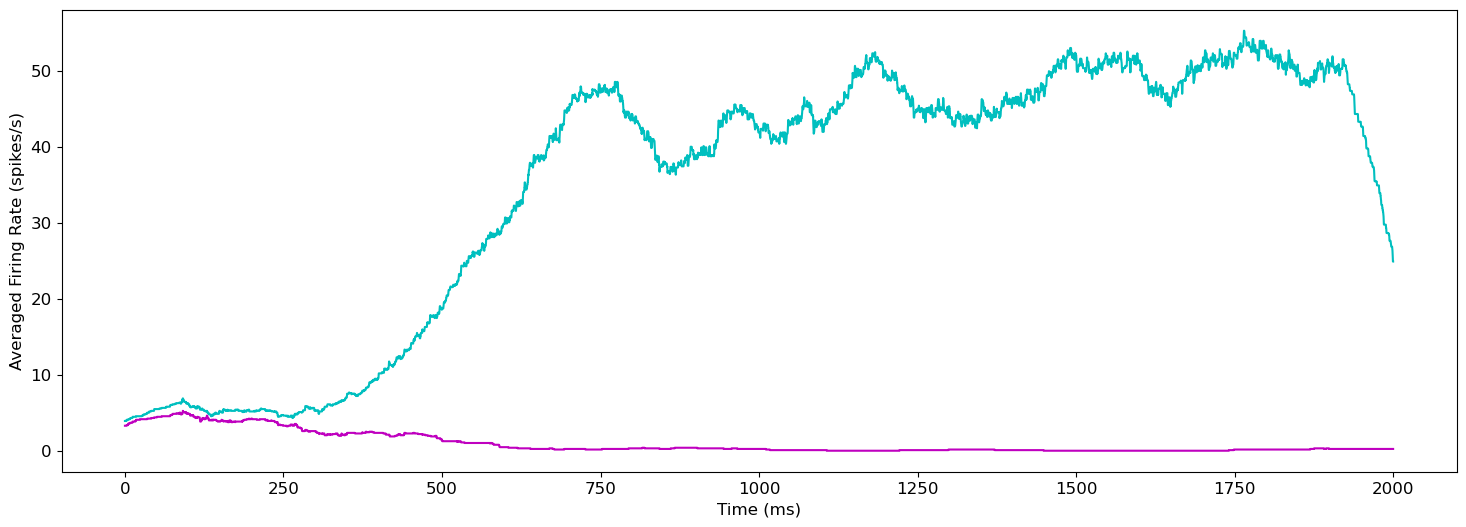

In [3]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['font.size'] = 12

fig, (ax_A) = plt.subplots(1, 1)

rate_excit_A =  results['rate_monitor_A']
rate_excit_B =  results['rate_monitor_B']
rate_inhib =  results['rate_monitor_inhib']

#rate_monitor_0 =  results_0['rate_monitor_inhib']


window_width = 150.1 * b2.ms
(ax_rate) = plt.plot(figsize=(10,4))
t_max  = len(rate_excit_A)
t_min = 0 
ts = rate_excit_A.t / b2.ms
idx_rate = (ts >= t_min) & (ts <= t_max)
smoothed_rates_A = rate_excit_A.smooth_rate(window="flat", width=window_width)/b2.Hz
smoothed_rates_B = rate_excit_B.smooth_rate(window="flat", width=window_width)/b2.Hz
smoothed_rates_ihb = rate_inhib.smooth_rate(window="flat", width=window_width)/b2.Hz

plt.plot(ts[idx_rate], smoothed_rates_A[idx_rate],'c')
plt.plot(ts[idx_rate], smoothed_rates_B[idx_rate], 'm')
#rate_ax.plot(ts[idx_rate], smoothed_rates_ihb[idx_rate])

plt.xlabel('Time (ms)')
plt.ylabel('Averaged Firing Rate (spikes/s)')

labels= ["Left","Right", "Inhibitory"]



In [26]:
rate_excit_A

<PopulationRateMonitor, recording neurongroup_1>

stimulus start: 0.0, stimulus end: 1.0
simulating 426 neurons. Start: Tue Jun 14 15:35:33 2022


WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]
INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


sim end: Tue Jun 14 15:37:01 2022


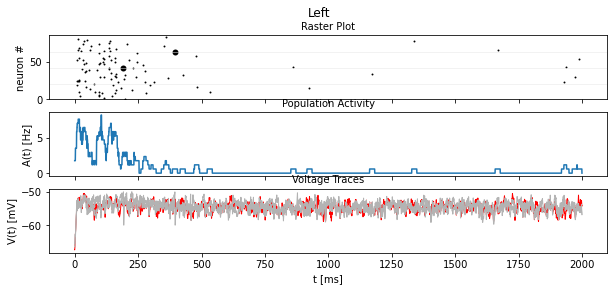

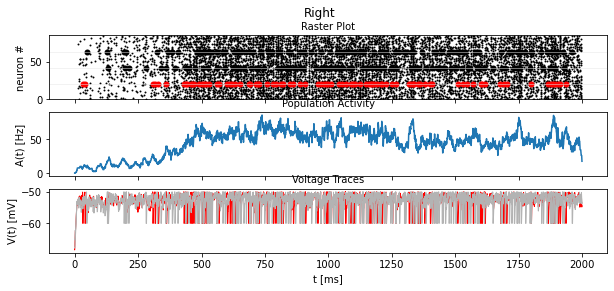

In [1]:
import wang

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time

b2.defaultclock.dt = 0.10 * b2.ms

%matplotlib inline
#from neurodynex3.competing_populations import decision_making

"""
A simple example to get started.
Returns:

"""
stim_start = 0. * b2.ms
stim_duration = 1000 * b2.ms
print("stimulus start: {}, stimulus end: {}".format(stim_start, stim_start+stim_duration))

results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                      t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                      coherence_level=+0.0, w_pos=2.0, mu0_mean_stimulus_Hz=250 * b2.Hz,
                                      max_sim_time=2000. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Left")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Right")

plt.show()

In [2]:
results_list = []
results_list.append(results)

In [3]:
results_list

[{'rate_monitor_A': <PopulationRateMonitor, recording neurongroup_1>,
  'spike_monitor_A': <SpikeMonitor, recording from spikemonitor_1>,
  'voltage_monitor_A': <StateMonitor, recording ['v'] from neurongroup_1>,
  'idx_monitored_neurons_A': [4,
   59,
   2,
   11,
   66,
   79,
   54,
   39,
   58,
   33,
   78,
   29,
   57,
   53,
   83,
   21,
   40,
   24,
   3,
   36,
   19,
   74,
   49,
   12,
   70,
   55,
   22,
   48,
   44,
   1,
   84,
   51,
   76,
   81,
   65,
   50,
   18,
   56,
   72,
   61,
   34,
   27,
   47,
   71,
   52,
   43,
   69,
   77,
   15,
   7,
   26,
   17,
   80,
   9,
   82,
   32,
   28,
   42,
   25,
   62,
   46,
   0,
   60,
   35,
   45,
   63,
   73,
   13,
   37,
   67,
   6,
   68,
   16,
   30,
   20,
   8,
   75,
   14,
   38,
   41,
   31,
   64,
   10,
   23,
   5],
  'rate_monitor_B': <PopulationRateMonitor, recording neurongroup_2>,
  'spike_monitor_B': <SpikeMonitor, recording from spikemonitor_2>,
  'voltage_monitor_B': <StateMonitor

In [47]:
rateA

<PopulationRateMonitor, recording neurongroup_1>

In [49]:
rates= []
rates.append(rateB)

In [50]:
rates

[<PopulationRateMonitor, recording neurongroup_2>]

In [51]:
import pickle

#a = {'hello': 'world'}

with open('filename.pickle', 'wb') as handle:
    pickle.dump(rates, handle, protocol=pickle.HIGHEST_PROTOCOL)

TypeError: cannot pickle 'weakref' object

In [52]:
import dill
import weakref
dill.loads(dill.dumps(rates.WeakKeyDictionary()))

ModuleNotFoundError: No module named 'dill'

In [31]:
import numpy
import brian2 as b2


def get_decision_time(rateA, rateB, avg_window_width=120.1*b2.ms,  rate_threshold=45.6*b2.Hz):
    
    
    #find which pop wins at last

    #rateA = rate_monitors["rate_monitor_A"]
    #rateB = rate_monitors["rate_monitor_B"]

    #window_width = 100.1 * b2.
    #(ax_rate) = plt.plot(figsize=(5,5))
    #t_max  = 1500
    #t_min = 0 
    #ts = rateA.t / b2.ms
    #idx_rate = (ts >= t_min) & (ts <= t_max)
    
    smoothed_rateA = rateA.smooth_rate(window="flat", width=avg_window_width)/b2.Hz
    smoothed_rateB = rateB.smooth_rate(window="flat", width=avg_window_width)/b2.Hz

    if (smoothed_rateB.max() < smoothed_rateA.max()):

        A_win = True
    else:

        A_win = False


    #get the firing rate differences between A and B

    if A_win:
        rate_diff = smoothed_rateA - smoothed_rateB
        winner = 'A'

    
    else:
        rate_diff = smoothed_rateB - smoothed_rateA
        winner = 'B'
    
    
    # find the time when the divergen starts happening
    threshold = rate_threshold/b2.Hz

    above_thre = (rate_diff > threshold)
    idx_over_threshold = numpy.where(above_thre==True)

    decision_time = idx_over_threshold[0][0];
    
    decision_time_in_ms = (decision_time/10)*b2.ms

    if A_win:
        decision_time_A = decision_time_in_ms
        decision_time_B = 0*b2.ms

    else:
        decision_time_A = 0*b2.ms
        decision_time_B = decision_time_in_ms
        



    return decision_time_A, decision_time_B



In [32]:
rateA = results["rate_monitor_A"]
rateB = results["rate_monitor_B"]

In [33]:
get_decision_time(rateA, rateB)

(0. * second, 0.6234 * second)